In [30]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA, IncrementalPCA

from sklearn.pipeline import Pipeline

import time

In [10]:
def load_data():
    df_train = pd.read_csv('./archive/mnist_train.csv')
    df_test = pd.read_csv('./archive/mnist_test.csv')
    
    return (df_train, df_test)

In [14]:
def preprocess(df_train, df_test):
    x_train_scale = scale(df_train.loc[ : , df_train.columns != 'label'])
    x_test_scale = scale(df_test.loc[ : , df_test.columns != 'label'])
    
    return (x_train_scale, x_test_scale)

In [18]:
def train_test_scale(df_train, df_test):
    
    x_train, x_test = preprocess(df_train, df_test)
    y_train = df_train['label']
    y_test = df_test['label']

    return (x_train, y_train, x_test, y_test)    

In [22]:
def ipca_analysis(x_train, x_test, n_components, batch_size):
    
    ipca = IncrementalPCA(n_components=n_components, batch_size=batch_size)

    x_train_pca = ipca.fit_transform(x_train)
    x_test_pca = ipca.transform(x_test)
    
    return (x_train_pca, x_test_pca)

In [23]:
def pca_analysis(x_train, x_test, n_components):
    
    pca = PCA(n_components=n_components, whiten=True)
    
    x_train_pca = pca.fit_transform(x_train)
    x_test_pca = pca.transform(x_test)
    
    return (x_train_pca, x_test_pca)

In [34]:
def create_model(x_train_pca, y_train):
    neigh = KNeighborsClassifier(n_neighbors=11)
    neigh.fit(x_train_pca, y_train)
    
    return neigh

In [29]:
def clac_accuracy(y_test, y_predicted):
    
    accuracy = accuracy_score(y_test, y_predicted)
    print('Model accuracy : ', accuracy)

    metric_score = precision_recall_fscore_support(y_test, y_predicted, average='macro')

    metric_name = ['precision', 'recall', 'fscore']

    for i in range(0, 3):
        print('Model ' + metric_name[i] + ' : ' + str(metric_score[i]))

In [19]:
def create_pie_distribution(data, label):
    
    classes = data.groupby(label)[label].count()
    plt.pie(classes, labels=classes.index, autopct='%.2f%%')
    plt.show()

In [28]:
def create_heat_map(y_test, y_predicted):
    cmat = confusion_matrix(y_test, y_predicted)
    
    fig, axs = plt.subplots(nrows=1)
    fig.set_size_inches(15, 9)
    sns.heatmap(cmat, annot=True)

In [40]:
def main():
    
    time1 = time.time()
    
    df_train, df_test = load_data()
    
    x_train, y_train, x_test, y_test = train_test_scale(df_train, df_test)
    
    x_train_pca, x_test_pca = ipca_analysis(x_train, x_test, 40, 100)
#     x_train_pca, x_test_pca = pca_analysis(x_train, x_test, 40)
    
    neigh = create_model(x_train_pca, y_train)

    y_predicted = neigh.predict(x_test_pca)
    
    time2 = time.time()
    
    duration = time2 - time1
    
    print('Pie Chart Distribution of all Digits...\n')
    label = 'label'
    create_pie_distribution(df_train, label)
    create_pie_distribution(df_train, label)
    
    clac_accuracy(y_test, y_predicted)    
    print('\nTime taken to run the whole model : ', duration)
    
    print('\nConfusion Matrix\n')
    create_heat_map(y_test, y_predicted)

Pie Chart Distribution of all Digits...



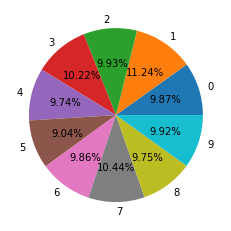

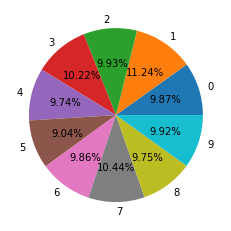

Model accuracy :  0.9481
Model precision : 0.9476794805806892
Model recall : 0.9476870809870185
Model fscore : 0.9476109487228076

Time taken to run the whole model :  54.80923819541931
Confusion Matrix



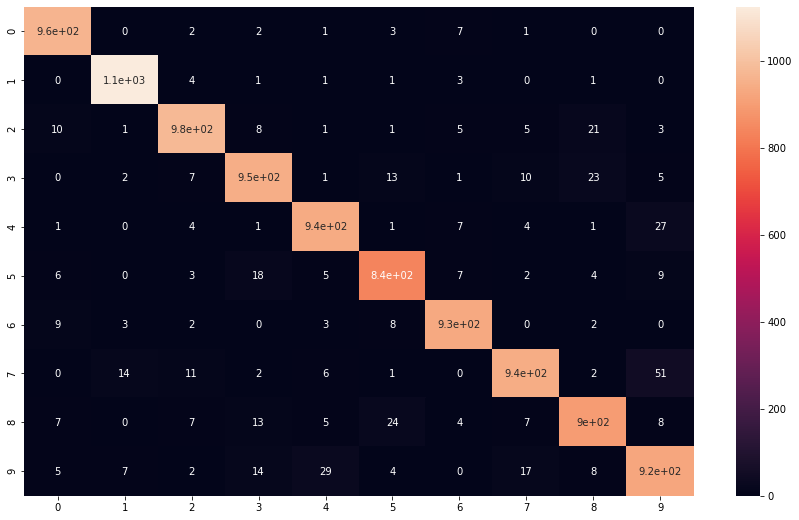

In [39]:
main()

for class=11, n_component=350 : 

Model accuracy :  0.944
Model precision : 0.9439473275368343
Model recall : 0.9433992549927532
Model fscore : 0.94345460474199

for class=10, n_component=350 : 

Model accuracy :  0.8594
Model precision : 0.8736014286491173
Model recall : 0.8572925006910488
Model fscore : 0.8594413787573151

for class=10, n_component=2, batch_size=2 : 

Model accuracy :  0.3551
Model precision : 0.3310347509628212
Model recall : 0.3445711772479681
Model fscore : 0.334461331601943

for class=11, n_component=2, batch_size=2 : 

Model accuracy :  0.3556
Model precision : 0.33215933322255065
Model recall : 0.34517903403788924
Model fscore : 0.335603930370905

for class=11, n_component=10, batch_size=10 : 

Model accuracy :  0.8863
Model precision : 0.8845548408536192
Model recall : 0.8844801856730129
Model fscore : 0.8842658227728222

for class=11, n_component=20, batch_size=20 : 

Model accuracy :  0.9306
Model precision : 0.9297781978859996
Model recall : 0.9295610044341871
Model fscore : 0.9295677547460672

for class=11, n_component=30, batch_size=30 : 

Model accuracy :  0.9421
Model precision : 0.9415522605391493
Model recall : 0.9415634267981072
Model fscore : 0.9414899623338725

for class=11, n_component=30, batch_size=40 : 

Model accuracy :  0.9429
Model precision : 0.9423280445249844
Model recall : 0.9423243609648004
Model fscore : 0.9422538815647252

for class=11, n_component=40, batch_size=40 : 

Model accuracy :  0.9479
Model precision : 0.947525039659617
Model recall : 0.9474844143745603
Model fscore : 0.9474119415671236

for class=11, n_component=40, batch_size=100 : 

